# Handwritten Image Recognition with Keras and MNIST

## References:

* https://codelabs.developers.google.com/codelabs/cloud-tensorflow-mnist/index.html?index=..%2F..index#0

* http://neuralnetworksanddeeplearning.com/chap1.html

* https://keras.io/

* https://www.ics.uci.edu/~mohamadt/keras_mnist.html


### Imports

In [1]:
import numpy as np
import keras

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Input
from keras.utils import np_utils
from keras.regularizers import l2

from matplotlib import pyplot as plt
%matplotlib inline

print("Keras Version " + keras.__version__)

Using TensorFlow backend.
/home/morgan/GMIT/modules/Emerging_Tech/ET_PROJECT_2019/etp_env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/morgan/GMIT/modules/Emerging_Tech/ET_PROJECT_2019/etp_env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/morgan/GMIT/modules/Emerging_Tech/ET_PROJECT_2019/etp_env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)

Keras Version 2.3.1


/home/morgan/GMIT/modules/Emerging_Tech/ET_PROJECT_2019/etp_env/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/morgan/GMIT/modules/Emerging_Tech/ET_PROJECT_2019/etp_env/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/morgan/GMIT/modules/Emerging_Tech/ET_PROJECT_2019/etp_env/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '

### Set Batch Size and Number of Epochs

In [2]:
BATCH_SIZE = 128
EPOCHS = 10

### Load and Prepare Data Set

* Loading the data set by calling the mnist.load_data() function.
* Storing the data into arrays for the test and train set, along with their labels.
* Using reshape() from NumPy to give a new shape to the array without losing any data.
* Casting arrays as type: float32
* One hot encoding transforms categorical labels to 0s and 1s in order for the model to interpret [https://www.youtube.com/watch?v=v_4KWmkwmsU]


In [3]:
# Loading data from training and test sets along with labels
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# Print data
print("Original X Shape", X_train.shape)
print("Original Y Shape", Y_train.shape)

# Reshaping data (28 * 28 = 784)
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255 # Original data is uint8 (0-255). Scale to range [0,1]
X_test /= 255

print("Training X Matrix Shape", X_train.shape)
print("Training X Matrix Shape", X_test.shape)

# print (Y_train[0])

# Represent the targets as one-hot vectors i.e 3 --> [0,0,0,0,1,0,0,0,0]
nb_classes = 10

Y_train = np_utils.to_categorical(Y_train, nb_classes)
Y_test = np_utils.to_categorical(Y_test, nb_classes)

print("Training Y matrix shape", Y_train.shape)
print("Testing Y matrix shape", Y_test.shape)

Original X Shape (60000, 28, 28)
Original Y Shape (60000,)
Training X Matrix Shape (60000, 784)
Training X Matrix Shape (10000, 784)
Training Y matrix shape (60000, 10)
Testing Y matrix shape (10000, 10)


### Viewing data

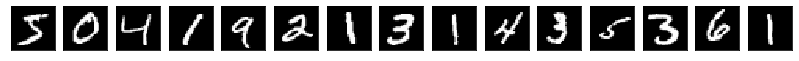

In [4]:
# Plot examples of the data.
plt.figure(1, figsize=(14,3))
for i in range(15):
    plt.subplot(1,15,i+1)
    plt.imshow(X_train[i].reshape(28,28), cmap='gray', interpolation='nearest')
    plt.xticks([])
    plt.yticks([])

### Sequentail Keras Model

#### Notes:
* Adding more layers to allow the network to go deeper.
* Chaging 'sigmoid' to 'relu', reason being that even if the gradients coming from some neurons can be zero, there will always be others giving a clear non-zero gradient and training can continue at a good pace.
* Changing 'sgd' to 'adam' --> Better optimizer
* Adding dropout after each dense layer. Regularization technique.

##### Glossary:
* accuracy: metric used to keep track of during training.
* optimiser: algorithm used to update the weights.
* loss function: objective function being optimised. Using categorical crossentrophy as appropriate loss function for softmax output.

In [5]:
model = Sequential()

model.add(Dense(300, activation='relu', input_shape=(784,), W_regularizer=l2(0.001)))
model.add(Dense(300, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=keras.optimizers.Adam(lr=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# print model layers
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_2 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                3010      
Total params: 328,810
Trainable params: 328,810
Non-trainable params: 0
_________________________________________________________________


/home/morgan/GMIT/modules/Emerging_Tech/ET_PROJECT_2019/etp_env/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(300, activation="relu", input_shape=(784,), kernel_regularizer=<keras.reg...)`
  This is separate from the ipykernel package so we can avoid doing imports until


### Train the model

In [6]:
history = model.fit(X_train, Y_train, BATCH_SIZE, EPOCHS, verbose=1,
                    validation_data=(X_test, Y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 58us/step - loss: 0.4726 - accuracy: 0.9185 - val_loss: 0.3922 - val_accuracy: 0.9369
Epoch 2/10
60000/60000 [==============================] - 3s 56us/step - loss: 0.3686 - accuracy: 0.9384 - val_loss: 0.3692 - val_accuracy: 0.9377
Epoch 3/10
60000/60000 [==============================] - 3s 57us/step - loss: 0.3336 - accuracy: 0.9420 - val_loss: 0.3032 - val_accuracy: 0.9474
Epoch 4/10
60000/60000 [==============================] - 3s 57us/step - loss: 0.3169 - accuracy: 0.9440 - val_loss: 0.2995 - val_accuracy: 0.9522
Epoch 5/10
60000/60000 [==============================] - 3s 57us/step - loss: 0.3100 - accuracy: 0.9454 - val_loss: 0.2956 - val_accuracy: 0.9489
Epoch 6/10
60000/60000 [==============================] - 3s 57us/step - loss: 0.3056 - accuracy: 0.9464 - val_loss: 0.3083 - val_accuracy: 0.9427
Epoch 7/10
60000/60000 [==============================] - 3s 58us/s

### Visualising predictions

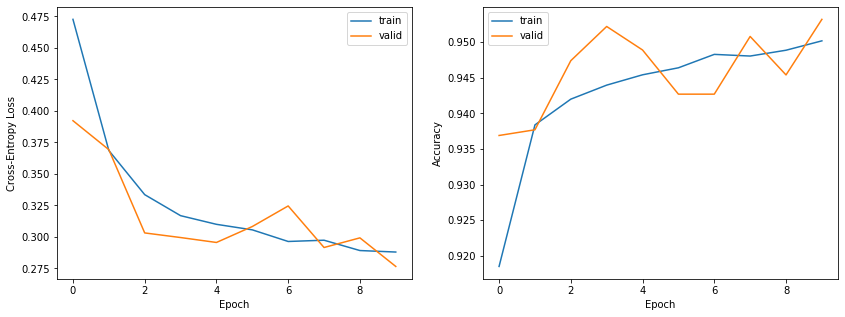

In [7]:
# Plot loss trajectory throughout training.
plt.figure(1, figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='valid')
plt.xlabel('Epoch')
plt.ylabel('Cross-Entropy Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='valid')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

### Evaluate the performance

In [8]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test cross-entropy loss: %0.5f' % score[0])
print('Test accuracy: %0.2f' % score[1])

Test cross-entropy loss: 0.27660
Test accuracy: 0.95


In [9]:
print (score)

[0.27660265045166016, 0.9531999826431274]


### Visualise and inspect the output

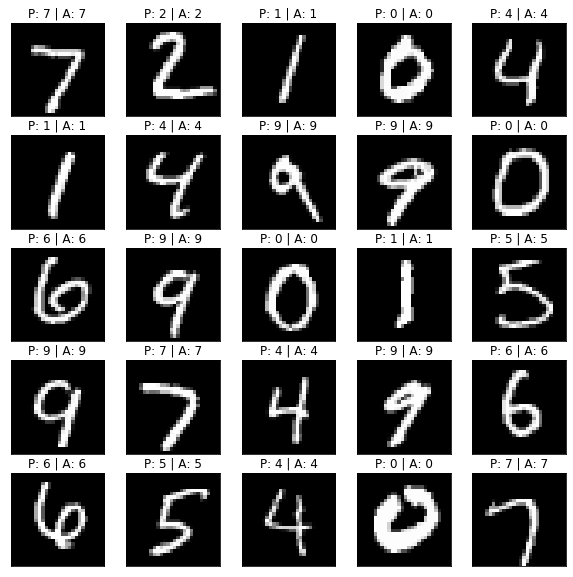

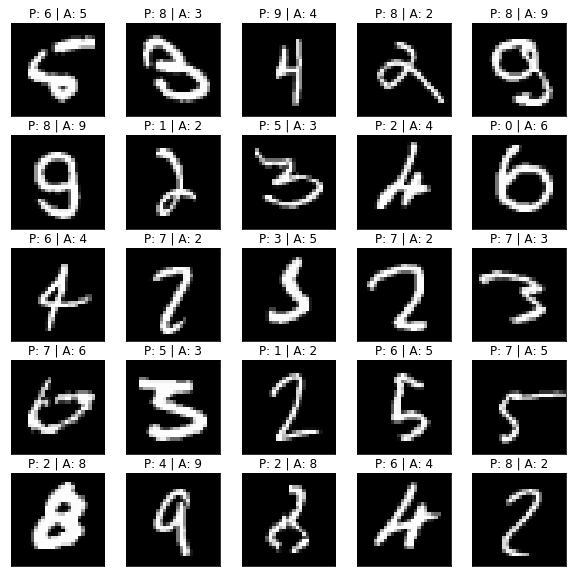

In [51]:
predicted_classes = model.predict_classes(X_test)
correct_indices   = np.nonzero(predicted_classes == Y_test.argmax(axis=-1))[0]
incorrect_indices = np.nonzero(predicted_classes != Y_test.argmax(axis=-1))[0]

# Plot the correct images
plt.figure(1, figsize=(10,10))
for i, correct in enumerate(correct_indices[:25]):
    plt.subplot(5,5,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
   
    # Where P --> Predicted, A --> Actual
    plt.title("P: {} | A: {}".format(predicted_classes[correct], Y_test[correct].argmax(axis=-1)))
    plt.xticks([])
    plt.yticks([])
    
# Plot the incorrect images
plt.figure(2, figsize=(10,10))
for i, incorrect in enumerate(incorrect_indices[:25]):
    plt.subplot(5,5,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    
    # Where P --> Predicted, A --> Actual
    plt.title("P: {} | A: {}".format(predicted_classes[incorrect], Y_test[incorrect].argmax(axis=-1)))
    plt.xticks([])
    plt.yticks([])